In [2]:
from tensorflow.python.summary.summary_iterator import summary_iterator
import pandas as pd
import os
import glob # For finding files matching a pattern
import pandas as pd
# Ensure you have the correct import for summary_iterator based on your TensorFlow version.
# For TensorFlow 1.x style or older TensorBoard versions:
from tensorflow.python.summary.summary_iterator import summary_iterator
# For newer versions of TensorBoard/TensorFlow 2.x, you might use EventAccumulator:
# from tensorboard.backend.event_processing import event_accumulator

def load_scalar_data_tf(log_dir_path, tag_name):
    steps = []
    values = []
    event_file_path = None

    # Construct the search pattern for event files
    search_pattern = os.path.join(log_dir_path, 'events.out.tfevents.*')
    possible_event_files = glob.glob(search_pattern)

    if not possible_event_files:
        print(f"Error: No event files matching pattern '{search_pattern}' found in directory: {log_dir_path}")
        return pd.DataFrame({'step': [], 'value': []})


    
    event_file_path = possible_event_files[0] 


    for event in summary_iterator(event_file_path):
        for v in event.summary.value:
            if v.tag == tag_name:
                steps.append(event.step) 
                values.append(v.simple_value) 
    
    return pd.DataFrame({'step': steps, 'value': values})



baseline_event_file_path = './HalfCheetah_baseline_5_per_llm/'
ours_event_file_path_1 = './HalfCheetah_ours_30_per_llm/'
ours_event_file_path_2 = "HalfCheetah_ours_5_per_llm/"
tag_name = 'charts/episodic_return'

baseline_data = load_scalar_data_tf(baseline_event_file_path, tag_name)

ours_data1 = load_scalar_data_tf(ours_event_file_path_1, tag_name)

ours_data2 = load_scalar_data_tf(ours_event_file_path_2, tag_name)

2025-05-18 16:32:14.778251: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-18 16:32:15.590347: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-18 16:32:15.592932: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-18 16:32:20.199561: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


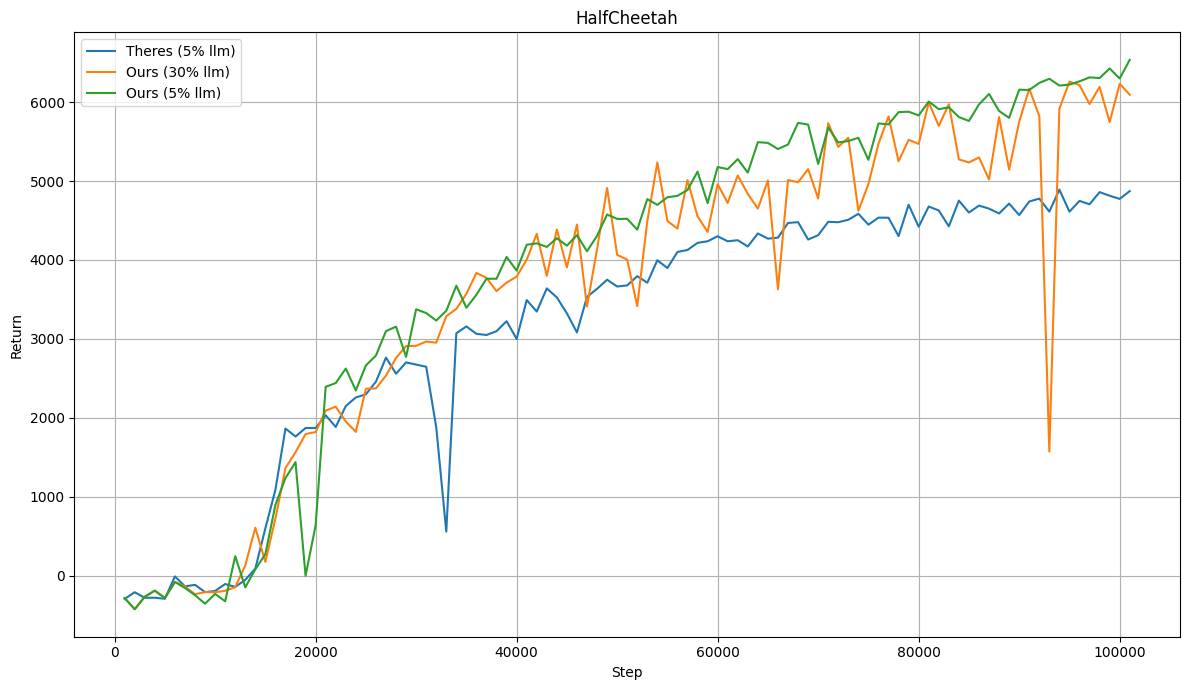

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))

plt.plot(baseline_data['step'], baseline_data['value'], label='Theirs (5% llm)')

plt.plot(ours_data1['step'], ours_data1['value'], label='Ours (30% llm)')

plt.plot(ours_data2['step'], ours_data2['value'], label='Ours (5% llm)')

plt.xlabel('Step')
plt.ylabel("Return")
plt.title('HalfCheetah')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()